## AI-STOCK-ANALYSER USING CHAT GPT AND LANGCHAIN

- Getting chat GPT API

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
api_key = ''

In [3]:
# setup model
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    model = 'gpt-4.1',
    temperature=0,
    max_completion_tokens=None,
    timeout=None,
    max_retries=2,
    api_key=api_key
    )

In [4]:
import yfinance as yf
import datetime as dt

assets = {'Apple (AAPL)',
          'Amazon (AMZN)',
          'Walmart (WMT)',
          'Google (GOOGL)',
          'Meta (META)',
          'Microsoft (MSFT)',
          'Nvidia (NVDA)',
          'S&P 500 index (SPY)',
          'Tesla (TSLA)'  
}

start_year = 2022
end_year = 2023

In [5]:
prompt = f"""
    Can you provide a Python code snippet using the yfinance library 
    to download historical stock data for the following {assets}for the years {start_year} and {end_year}:
    """

In [6]:
from IPython.display import display, Markdown
def output():
    response = llm.invoke(prompt)
    display(Markdown(response.content))

In [7]:
# PROMPT
prompt = f"""
    Can you provide a Python code snippet using the yfinance library 
    to download historical stock data for the following {assets}for the years {start_year} and {end_year}:
    """

output()

Certainly! Below is a Python code snippet using the yfinance library to download historical daily stock data for the specified tickers for the years 2022 and 2023:

```python
import yfinance as yf

# List of tickers
tickers = ['SPY', 'GOOGL', 'META', 'TSLA', 'AMZN', 'WMT', 'AAPL', 'MSFT', 'NVDA']

# Download data for 2022 and 2023
data = yf.download(
    tickers=tickers,
    start='2022-01-01',
    end='2023-12-31',
    group_by='ticker'
)

# Display the first few rows for one ticker as an example
print(data['AAPL'].head())
```

**Notes:**
- This will download daily OHLCV data for each ticker.
- The data is organized in a multi-level column format, with the first level being the ticker.
- You can access each ticker's data as shown in the last line (e.g., `data['AAPL']`).
- If you want to save the data to CSV files, you can do so for each ticker:

```python
for ticker in tickers:
    data[ticker].to_csv(f"{ticker}_2022_2023.csv")
```

**Make sure you have yfinance installed:**
```bash
pip install yfinance
```

Let me know if you need the data in a different format!

# fetch the data

In [8]:
import yfinance as yf


tickers = ['AAPL', 'AMZN', 'WMT', 'GOOGL', 'META', 'MSFT', 'NVDA', 'SPY', 'TSLA']
tickers.sort()
start_date = '2022-01-01'
end_date = '2023-12-31' 

data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker', auto_adjust=True)
for ticker in tickers:
    print(f"\nData for {ticker}:")
    print(data[ticker].head(10))

[*********************100%***********************]  9 of 9 completed


Data for AAPL:
Price             Open        High         Low       Close     Volume
Date                                                                 
2022-01-03  174.345039  179.296076  174.227395  178.443115  104487900
2022-01-04  179.050994  179.354917  175.609770  176.178406   99310400
2022-01-05  176.090157  176.639180  171.217554  171.492065   94537600
2022-01-06  169.315567  171.864620  168.276342  168.629288   96904000
2022-01-07  169.501866  170.727370  167.678316  168.795975   86709100
2022-01-10  165.766514  169.119490  164.874343  168.815567  106765600
2022-01-11  168.943034  171.746972  167.472430  171.648941   76138300
2022-01-12  172.668553  173.707777  171.394041  172.090118   74805200
2022-01-13  172.335210  173.158744  168.423397  168.815567   84505800
2022-01-14  167.982237  170.374422  167.737136  169.678345   80440800

Data for AMZN:
Price             Open        High         Low       Close    Volume
Date                                                       

# Finance KPI for Stock-Analysis


-RSI

-MACD

-Bollinger bands

-P/E ratio

-Beta


In [9]:
# prompt

prompt =  f"""
        tell me the top-10 kpis i could check for the performance of the stock (ex: RSI,MACD,Bollinger bands,P/E ratio, Beta)
        with data available on yfinance.
        Explain the KPIs and how to interpret them.
        Provide the pyhton code to compute and visualize each of the KPIs.
        Make sure the KPI can be easilly extracted to include in the following prompt for interpretation.      
        The structure should be :
        1) What is the KPIs and how to interpret
        2) Code snippet for a function to visualize over time for each of the {assets} separately
        for each kpi.
        years of analysis are {start_year} and {end_year}."""
    
output()


Certainly! Here are **10 key KPIs** for stock performance, all available via [yfinance](https://pypi.org/project/yfinance/), with explanations, interpretation, and Python code for each.  
**All code snippets are ready to use and can be adapted for any of the specified tickers.**  
**Analysis period:** 2022-01-01 to 2023-12-31.

---

## 1. Relative Strength Index (RSI)

**What is it & How to Interpret:**  
RSI measures the speed and change of price movements (momentum).  
- **Above 70:** Overbought (potentially overvalued, may fall)  
- **Below 30:** Oversold (potentially undervalued, may rise)

**Code:**
```python
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def plot_rsi(ticker):
    data = yf.download(ticker, start='2022-01-01', end='2023-12-31')
    delta = data['Adj Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    plt.figure(figsize=(12,4))
    plt.plot(rsi, label='RSI (14)')
    plt.axhline(70, color='red', linestyle='--')
    plt.axhline(30, color='green', linestyle='--')
    plt.title(f'RSI for {ticker}')
    plt.legend()
    plt.show()
```

---

## 2. Moving Average Convergence Divergence (MACD)

**What is it & How to Interpret:**  
MACD shows the relationship between two moving averages (12- and 26-day EMAs).  
- **MACD > Signal line:** Bullish  
- **MACD < Signal line:** Bearish

**Code:**
```python
def plot_macd(ticker):
    data = yf.download(ticker, start='2022-01-01', end='2023-12-31')
    ema12 = data['Adj Close'].ewm(span=12, adjust=False).mean()
    ema26 = data['Adj Close'].ewm(span=26, adjust=False).mean()
    macd = ema12 - ema26
    signal = macd.ewm(span=9, adjust=False).mean()
    plt.figure(figsize=(12,4))
    plt.plot(macd, label='MACD')
    plt.plot(signal, label='Signal Line')
    plt.title(f'MACD for {ticker}')
    plt.legend()
    plt.show()
```

---

## 3. Bollinger Bands

**What is it & How to Interpret:**  
Bollinger Bands consist of a moving average and two standard deviation bands.  
- **Price near upper band:** Overbought  
- **Price near lower band:** Oversold

**Code:**
```python
def plot_bollinger(ticker):
    data = yf.download(ticker, start='2022-01-01', end='2023-12-31')
    ma20 = data['Adj Close'].rolling(window=20).mean()
    std20 = data['Adj Close'].rolling(window=20).std()
    upper = ma20 + 2*std20
    lower = ma20 - 2*std20
    plt.figure(figsize=(12,4))
    plt.plot(data['Adj Close'], label='Adj Close')
    plt.plot(ma20, label='MA20')
    plt.plot(upper, label='Upper Band', linestyle='--')
    plt.plot(lower, label='Lower Band', linestyle='--')
    plt.title(f'Bollinger Bands for {ticker}')
    plt.legend()
    plt.show()
```

---

## 4. Price-to-Earnings Ratio (P/E Ratio)

**What is it & How to Interpret:**  
P/E = Price per share / Earnings per share.  
- **High P/E:** Expensive, high growth expectations  
- **Low P/E:** Cheap, possibly undervalued

**Code:**
```python
def get_pe_ratio(ticker):
    stock = yf.Ticker(ticker)
    pe = stock.info.get('trailingPE', None)
    print(f"{ticker} P/E Ratio: {pe}")
    return pe
```

---

## 5. Beta

**What is it & How to Interpret:**  
Beta measures volatility relative to the market (S&P 500).  
- **Beta > 1:** More volatile than market  
- **Beta < 1:** Less volatile

**Code:**
```python
def get_beta(ticker):
    stock = yf.Ticker(ticker)
    beta = stock.info.get('beta', None)
    print(f"{ticker} Beta: {beta}")
    return beta
```

---

## 6. Dividend Yield

**What is it & How to Interpret:**  
Dividend yield = Annual dividend / Price.  
- **High yield:** Attractive for income investors  
- **Low/No yield:** Growth focus

**Code:**
```python
def get_dividend_yield(ticker):
    stock = yf.Ticker(ticker)
    yield_ = stock.info.get('dividendYield', None)
    print(f"{ticker} Dividend Yield: {yield_}")
    return yield_
```

---

## 7. 50-day and 200-day Moving Averages (Golden/Death Cross)

**What is it & How to Interpret:**  
- **Golden Cross:** 50-day MA crosses above 200-day MA (bullish)  
- **Death Cross:** 50-day MA crosses below 200-day MA (bearish)

**Code:**
```python
def plot_moving_averages(ticker):
    data = yf.download(ticker, start='2022-01-01', end='2023-12-31')
    ma50 = data['Adj Close'].rolling(window=50).mean()
    ma200 = data['Adj Close'].rolling(window=200).mean()
    plt.figure(figsize=(12,4))
    plt.plot(data['Adj Close'], label='Adj Close')
    plt.plot(ma50, label='50-day MA')
    plt.plot(ma200, label='200-day MA')
    plt.title(f'50 & 200-day MAs for {ticker}')
    plt.legend()
    plt.show()
```

---

## 8. Sharpe Ratio

**What is it & How to Interpret:**  
Sharpe Ratio = (Return - Risk-free rate) / Volatility.  
- **Higher is better** (risk-adjusted return)

**Code:**
```python
def compute_sharpe_ratio(ticker, risk_free_rate=0.04):
    data = yf.download(ticker, start='2022-01-01', end='2023-12-31')
    returns = data['Adj Close'].pct_change().dropna()
    excess_return = returns.mean() * 252 - risk_free_rate
    volatility = returns.std() * (252 ** 0.5)
    sharpe = excess_return / volatility
    print(f"{ticker} Sharpe Ratio: {sharpe}")
    return sharpe
```

---

## 9. Volume Trend

**What is it & How to Interpret:**  
Tracks trading activity.  
- **Rising volume:** Confirms price trend  
- **Falling volume:** Weakens trend

**Code:**
```python
def plot_volume(ticker):
    data = yf.download(ticker, start='2022-01-01', end='2023-12-31')
    plt.figure(figsize=(12,4))
    plt.plot(data['Volume'], label='Volume')
    plt.title(f'Trading Volume for {ticker}')
    plt.legend()
    plt.show()
```

---

## 10. Earnings Per Share (EPS) Trend

**What is it & How to Interpret:**  
EPS = Net income / Shares outstanding.  
- **Rising EPS:** Positive growth  
- **Falling EPS:** Negative outlook

**Code:**
```python
def get_eps(ticker):
    stock = yf.Ticker(ticker)
    eps = stock.info.get('trailingEps', None)
    print(f"{ticker} EPS: {eps}")
    return eps
```

---

## Usage Example

For each KPI, just call the function with the ticker, e.g.:
```python
plot_rsi('AAPL')
plot_macd('GOOGL')
get_pe_ratio('TSLA')
```
**Tickers:**  
- 'SPY' (S&P 500 index)
- 'GOOGL' (Google)
- 'META' (Meta)
- 'TSLA' (Tesla)
- 'AMZN' (Amazon)
- 'WMT' (Walmart)
- 'AAPL' (Apple)
- 'MSFT' (Microsoft)
- 'NVDA' (Nvidia)

---

**You can extract the computed values (e.g., P/E, Beta, Sharpe) for further interpretation in your next prompt.**  
Let me know if you want a combined dashboard or further automation!

# RSI INDEX

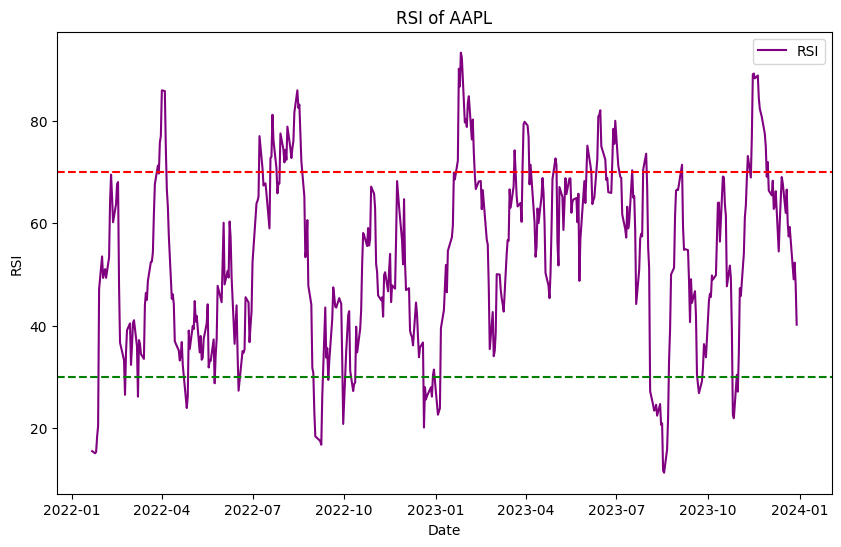

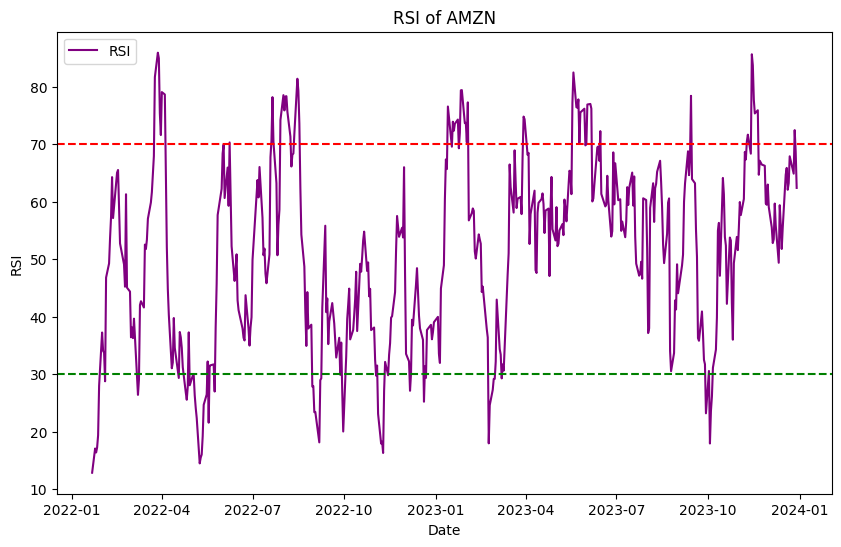

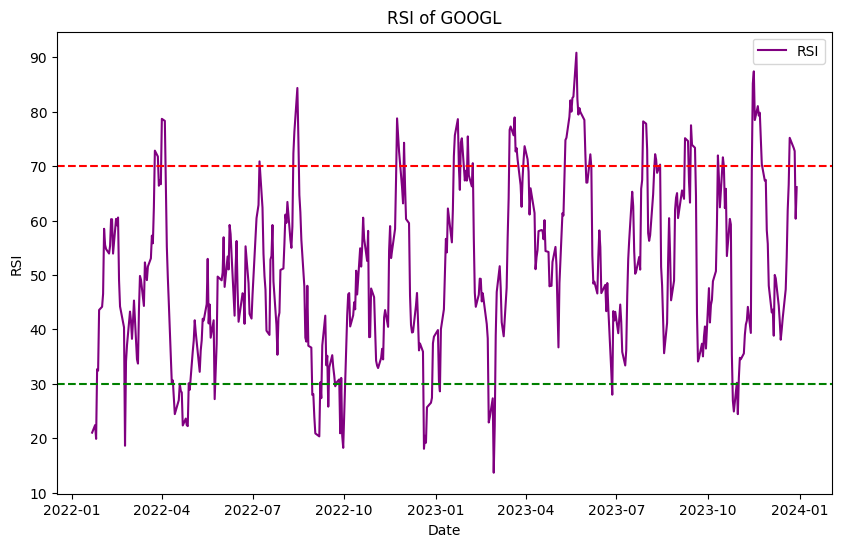

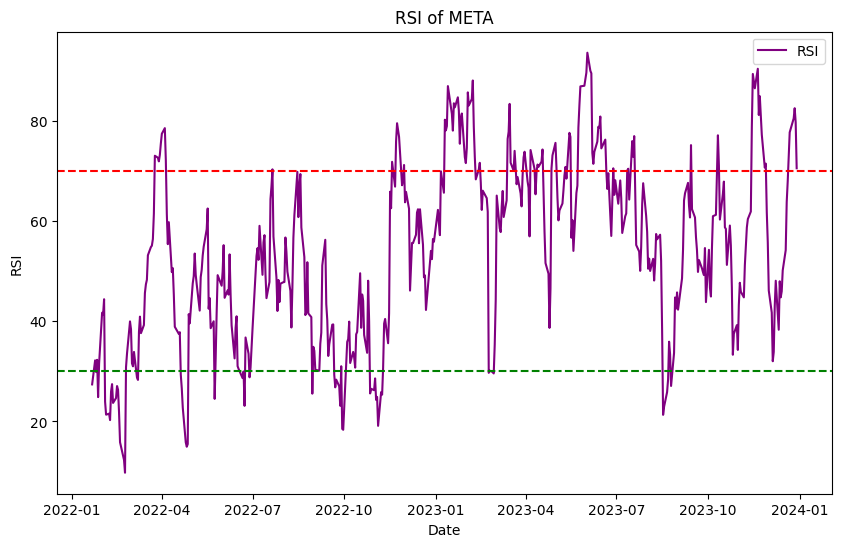

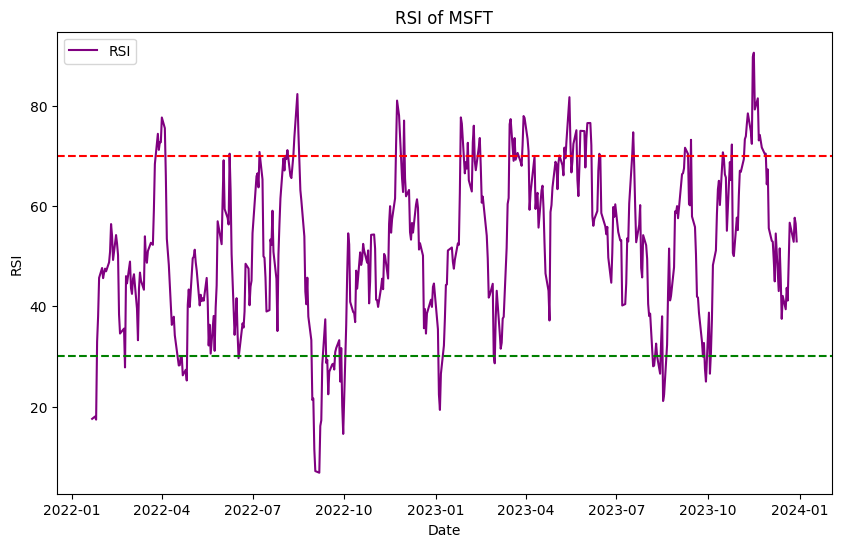

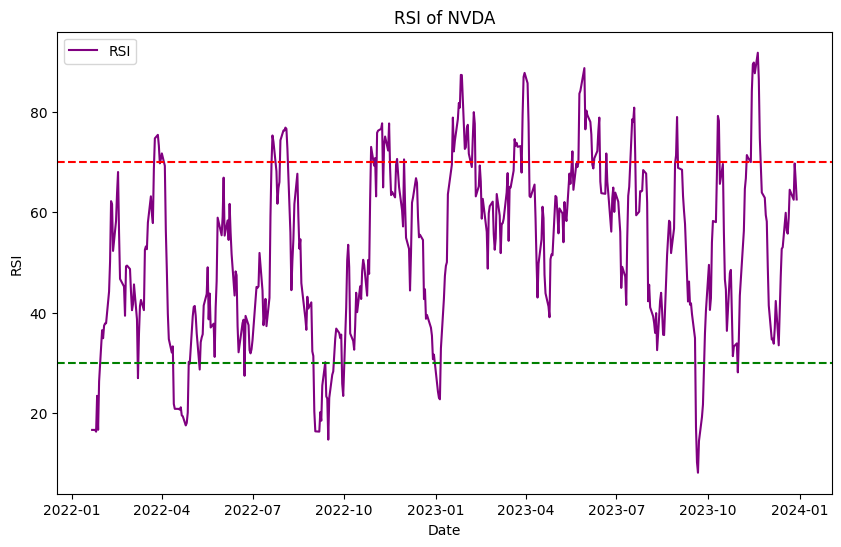

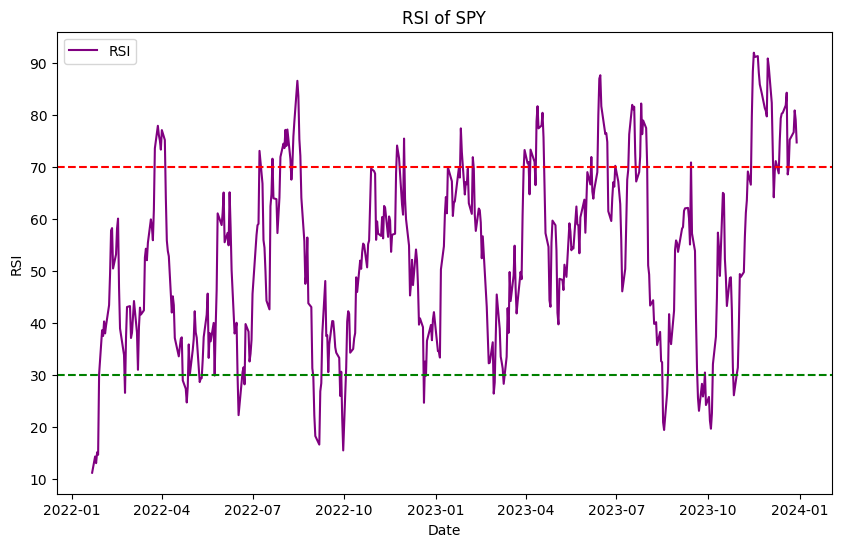

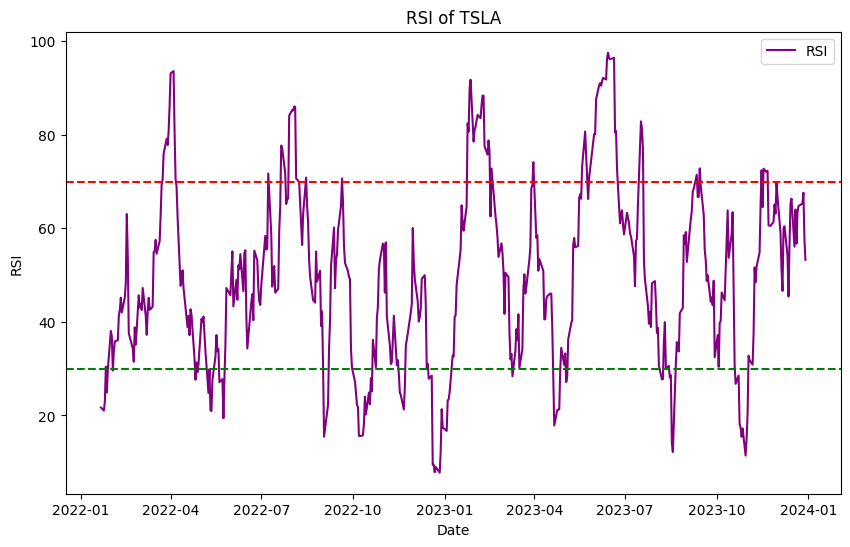

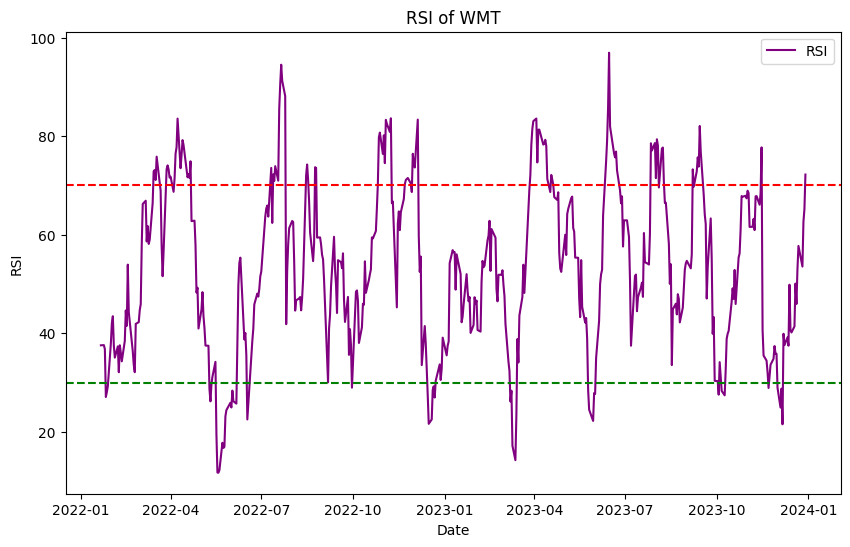

In [10]:
# RSI
def plot_rsi(ticker, start_date, end_date, window=14):
    stock = yf.Ticker(ticker)
    data = stock.history(start=start_date, end=end_date)
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))
    
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['RSI'], label='RSI', color='purple')
    plt.axhline(70, color='red', linestyle='--')
    plt.axhline(30, color='green', linestyle='--')
    plt.title(f'RSI of {ticker}')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.show()

for ticker in tickers:
    plot_rsi(ticker, '2022-01-01', '2023-12-31')

# Bollinger bands

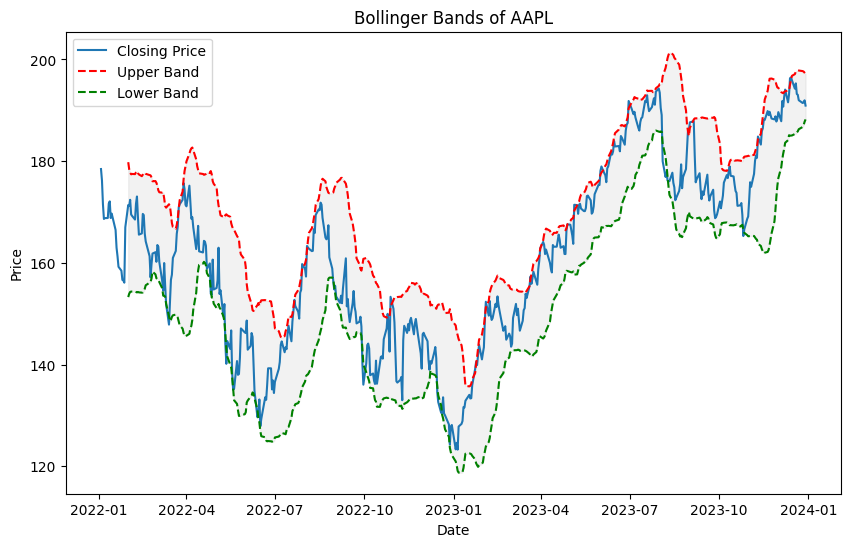

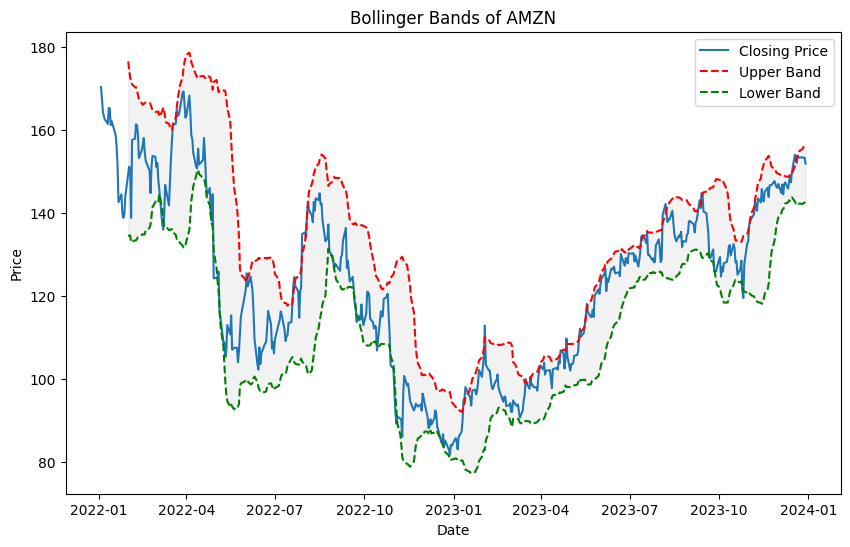

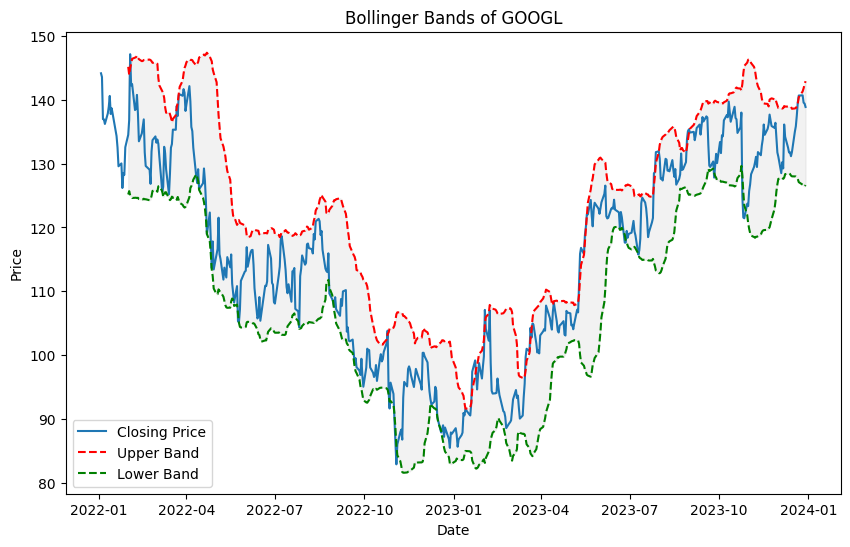

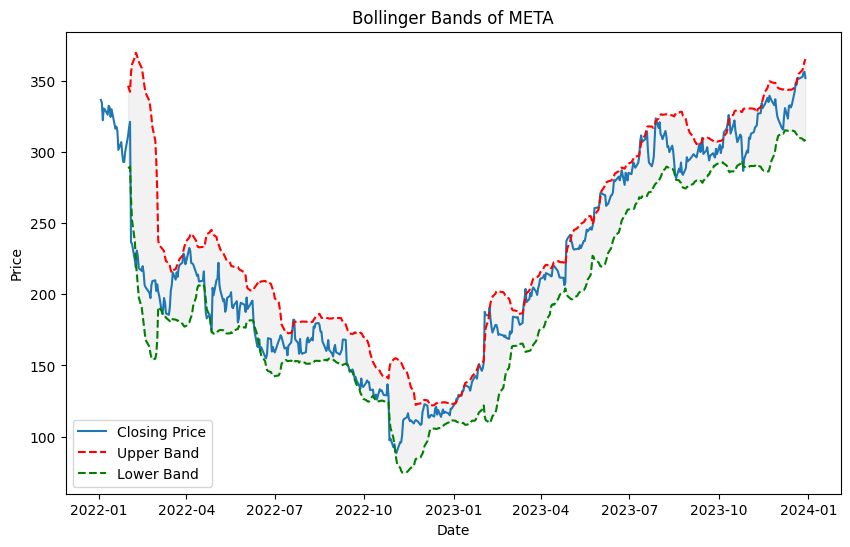

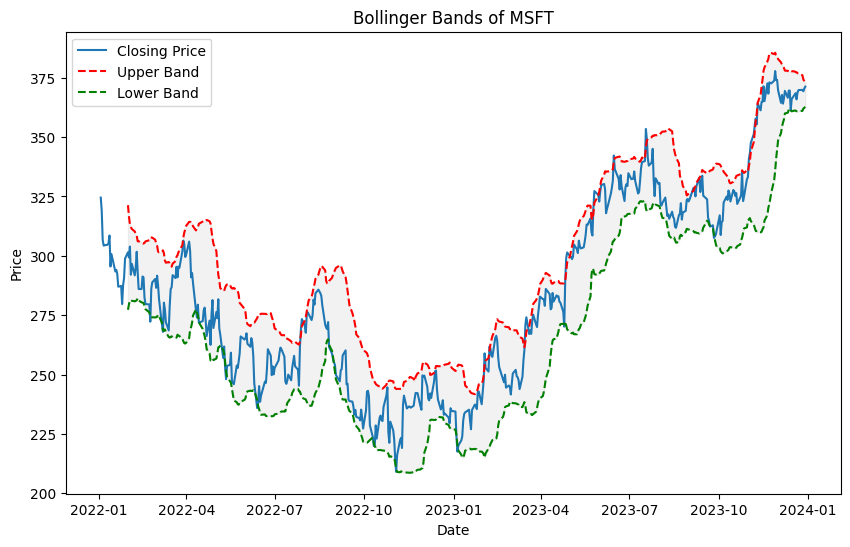

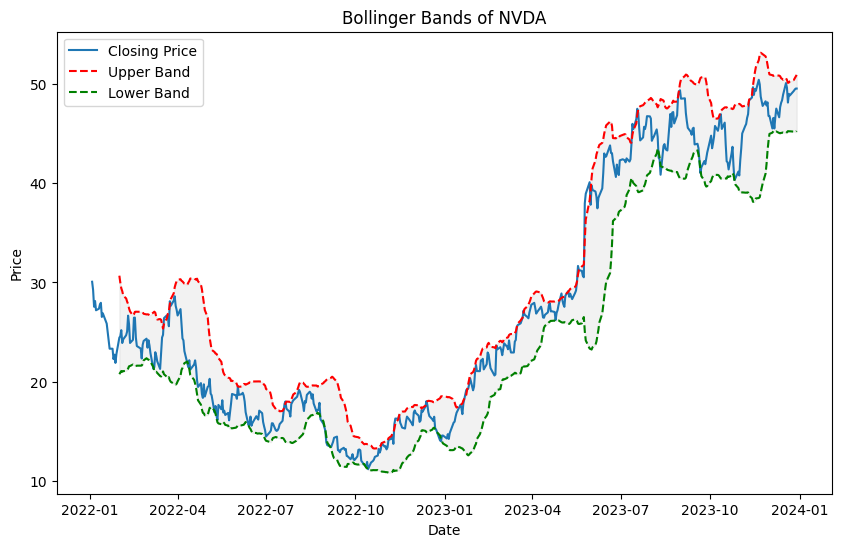

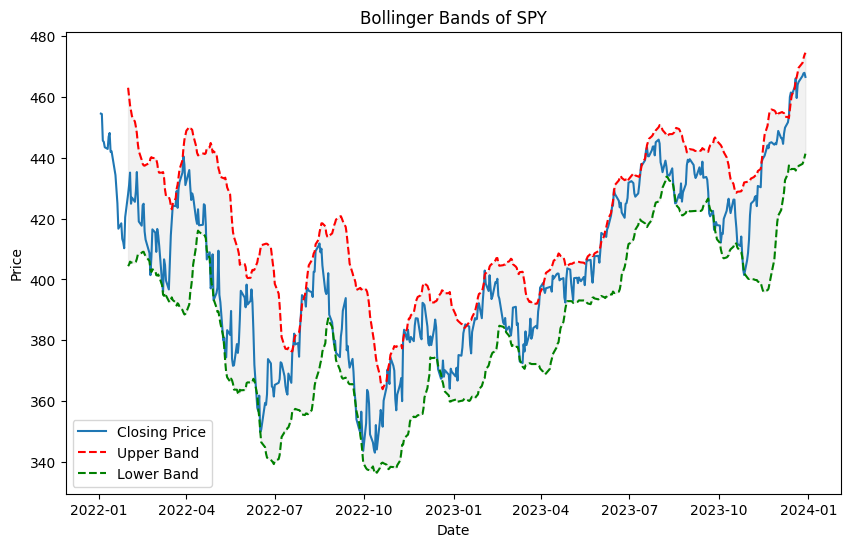

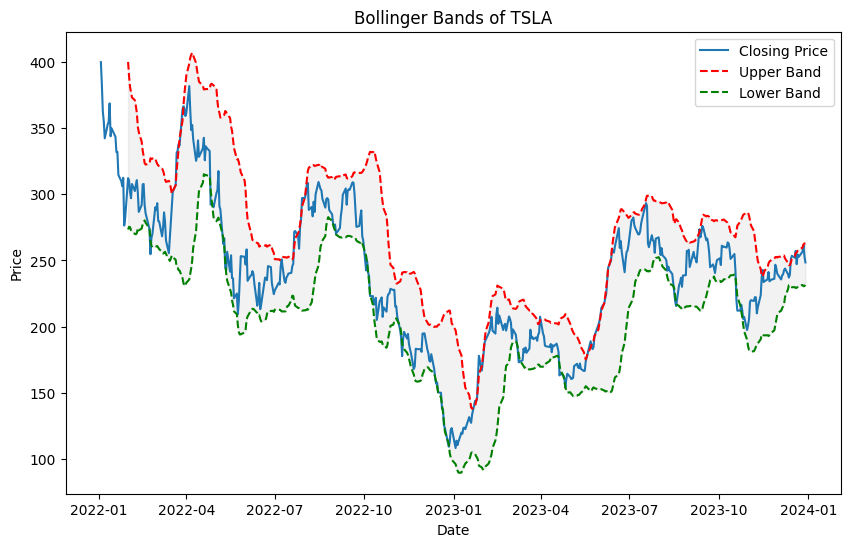

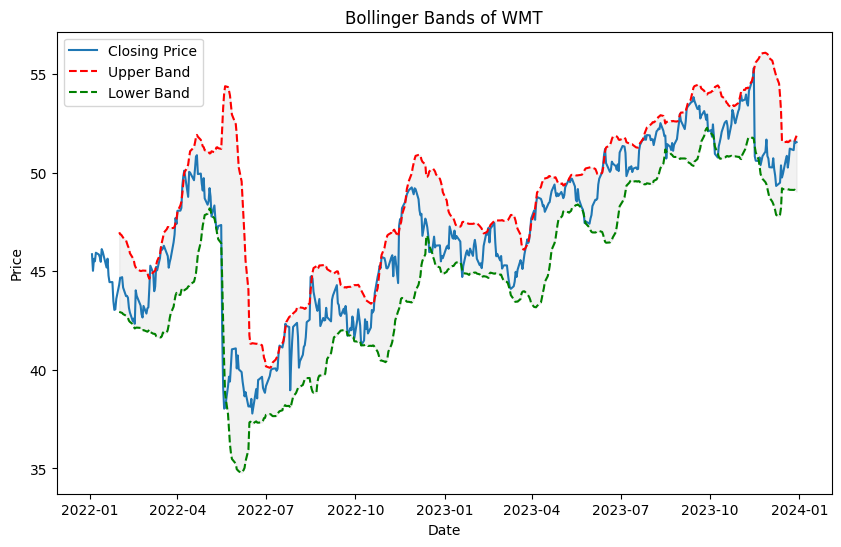

In [11]:
def plot_bollinger_bands(ticker, start_date, end_date, window=20):
    stock = yf.Ticker(ticker)
    data = stock.history(start=start_date, end=end_date)
    data['SMA'] = data['Close'].rolling(window=window).mean()
    data['Upper'] = data['SMA'] + 2 * data['Close'].rolling(window=window).std()
    data['Lower'] = data['SMA'] - 2 * data['Close'].rolling(window=window).std()
    
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], label='Closing Price')
    plt.plot(data.index, data['Upper'], label='Upper Band', linestyle='--', color='red')
    plt.plot(data.index, data['Lower'], label='Lower Band', linestyle='--', color='green')
    plt.fill_between(data.index, data['Lower'], data['Upper'], color='grey', alpha=0.1)
    plt.title(f'Bollinger Bands of {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

for ticker in tickers:
    plot_bollinger_bands(ticker, '2022-01-01', '2023-12-31')

# P/E ratio

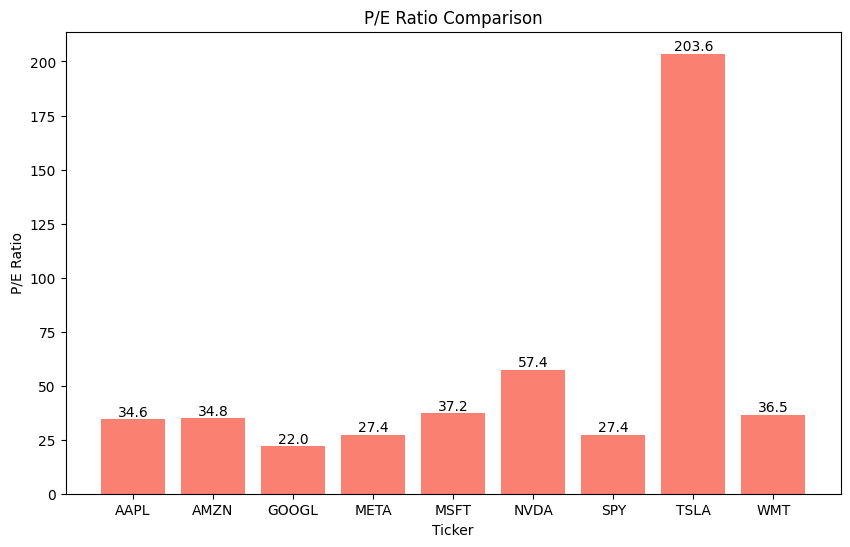

In [12]:
def plot_pe_ratio_comparison(tickers):
    pe_data = {}
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        pe_ratio = stock.info.get('trailingPE', None)
        if pe_ratio:
            pe_data[ticker] = pe_ratio
        else:
            print(f'P/E Ratio not available for {ticker}')

    if pe_data:
        plt.figure(figsize=(10, 6))
        plt.bar(pe_data.keys(), pe_data.values(), color='salmon')
        plt.title('P/E Ratio Comparison')
        plt.xlabel('Ticker')
        plt.ylabel('P/E Ratio')
        for i, (ticker, value) in enumerate(pe_data.items()):
            plt.text(i, value, f"{value:.1f}", ha='center', va='bottom')
        plt.show()
    else:
        print("No P/E data available for any ticker.")

plot_pe_ratio_comparison(tickers)


# BETA

Beta not available for SPY


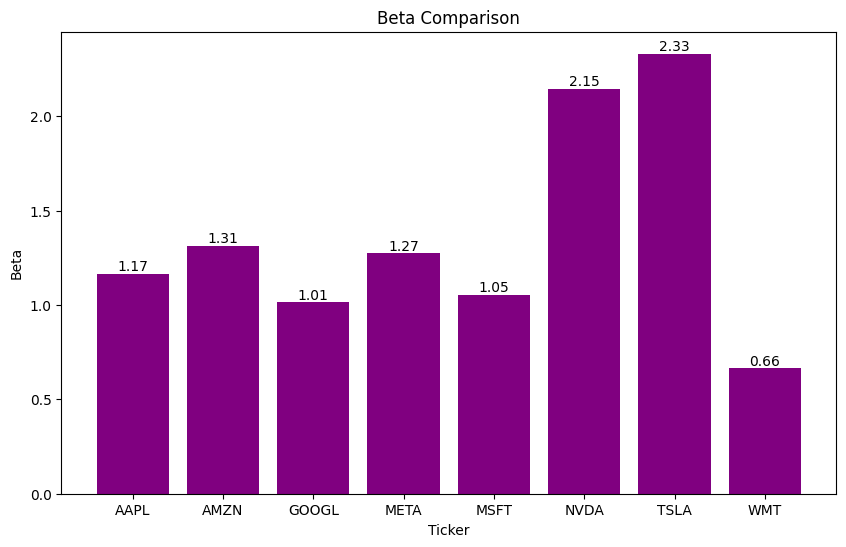

In [13]:
def plot_beta_comparison(tickers):
    beta_data = {}
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        beta = stock.info.get('beta', None)
        if beta:
            beta_data[ticker] = beta
        else:
            print(f'Beta not available for {ticker}')

    if beta_data:
        plt.figure(figsize=(10, 6))
        plt.bar(beta_data.keys(), beta_data.values(), color='purple')
        plt.title('Beta Comparison')
        plt.xlabel('Ticker')
        plt.ylabel('Beta')
        for i, (ticker, value) in enumerate(beta_data.items()):
            plt.text(i, value, f"{value:.2f}", ha='center', va='bottom')
        plt.show()
    else:
        print("No Beta data available for tickers")

plot_beta_comparison(tickers)


# MACD

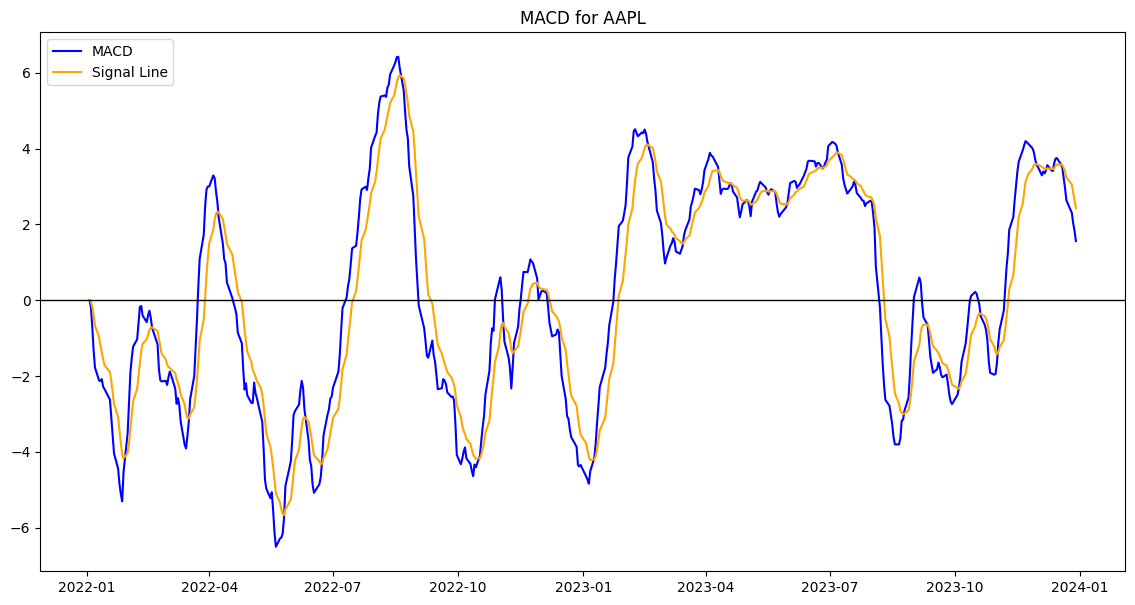

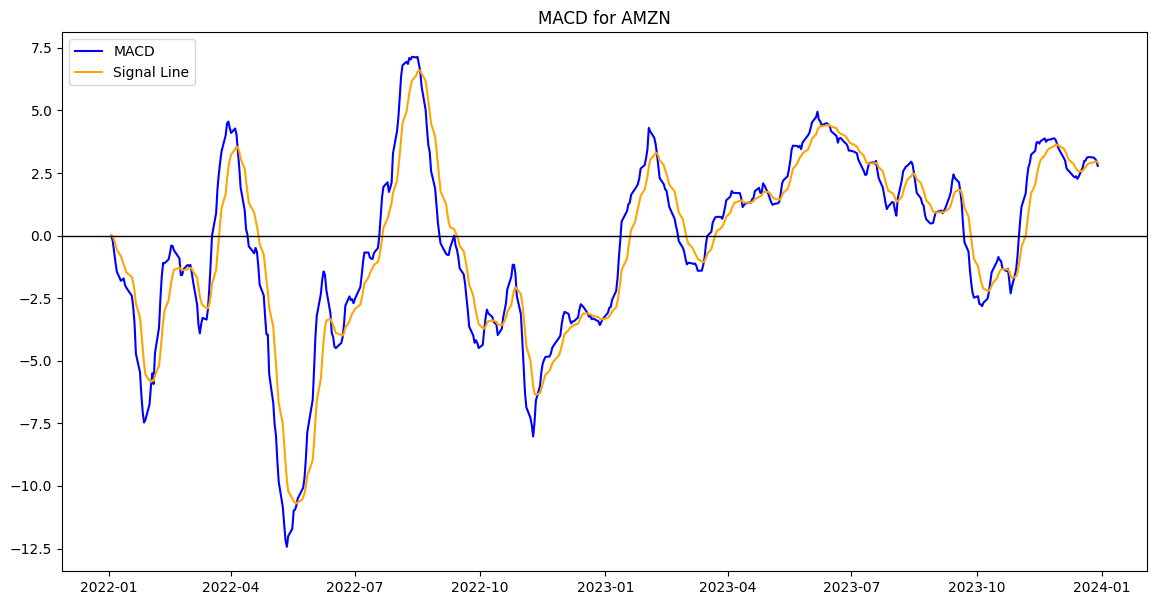

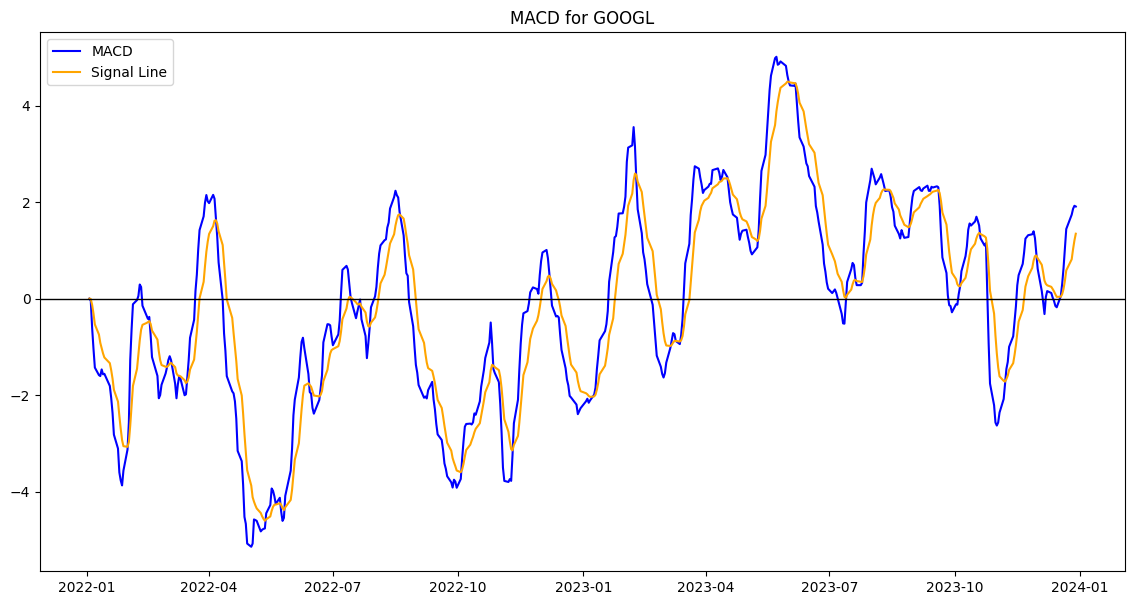

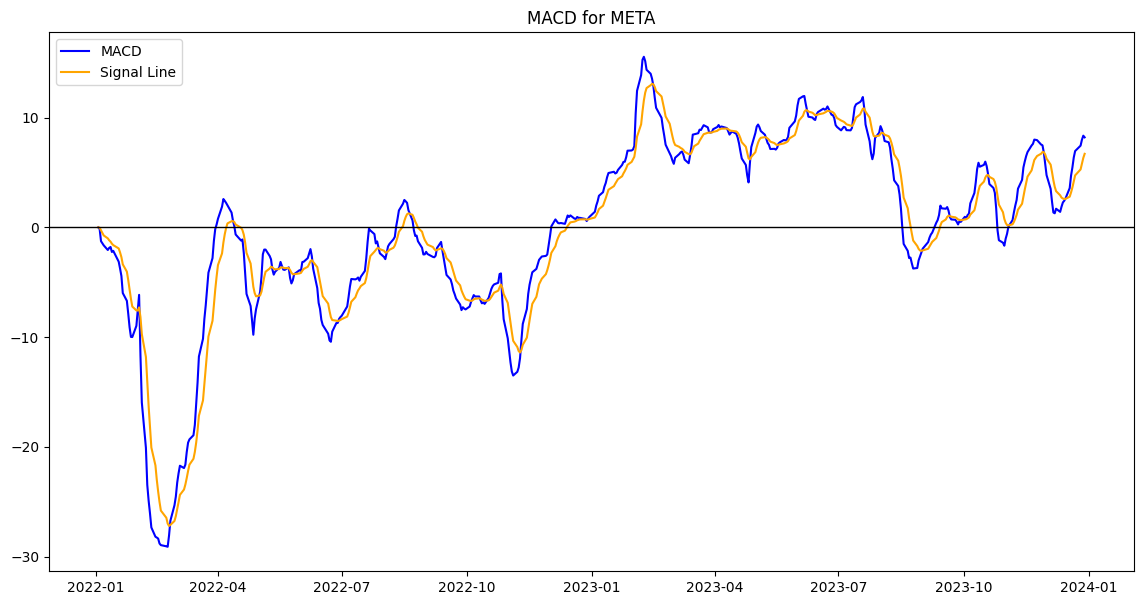

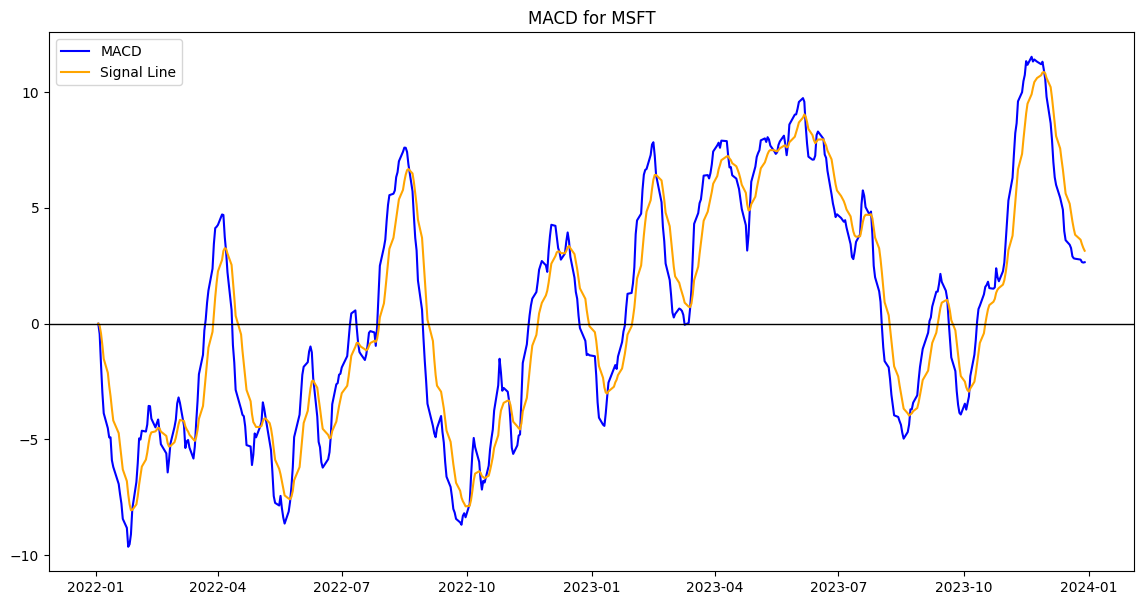

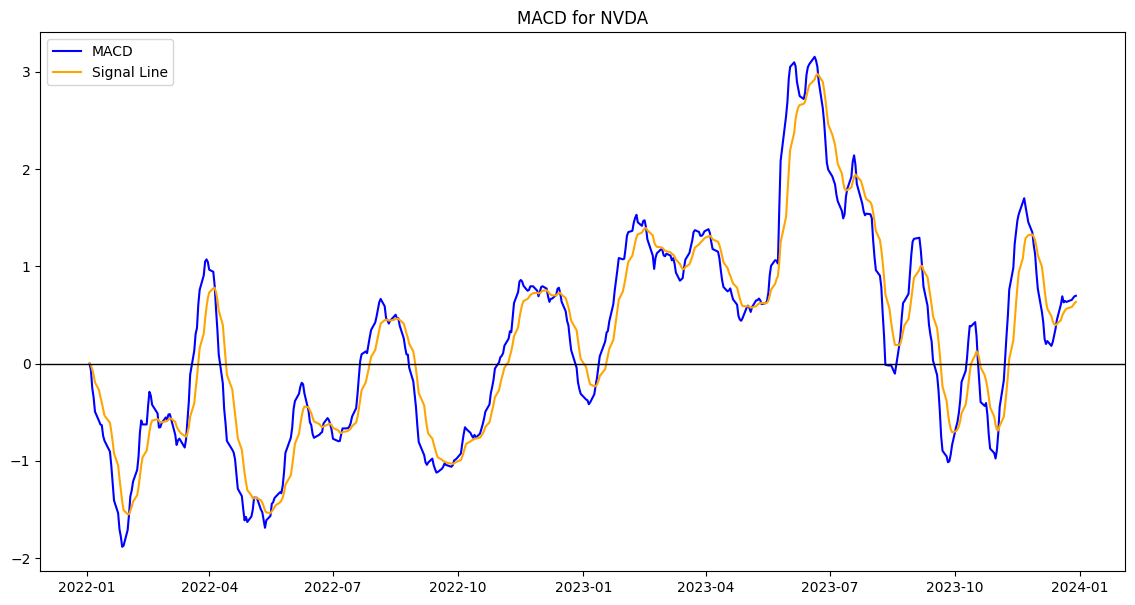

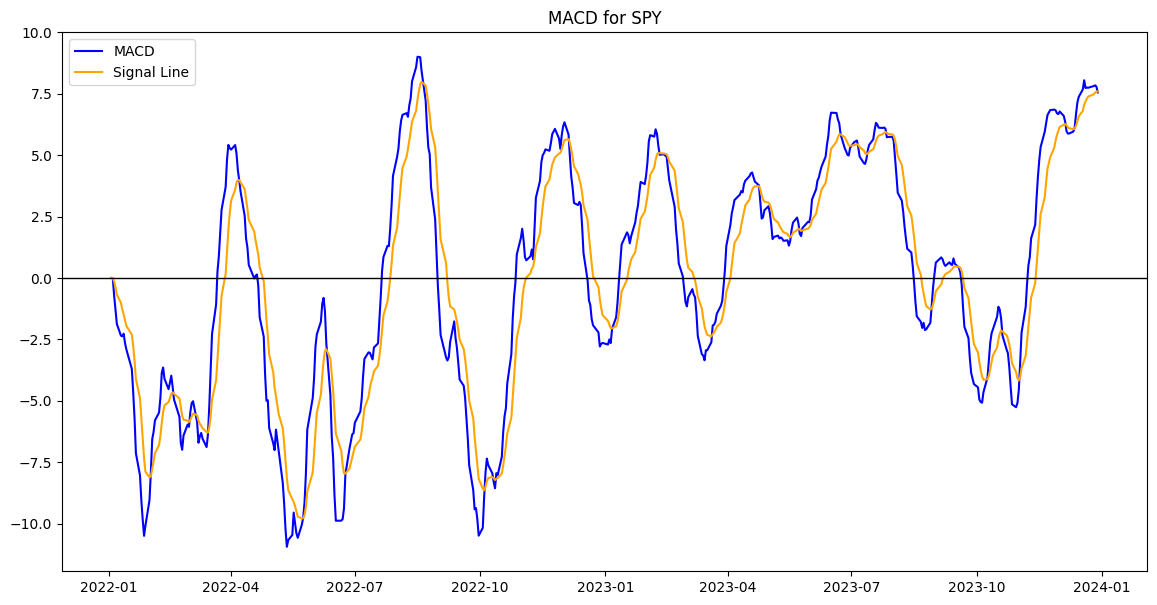

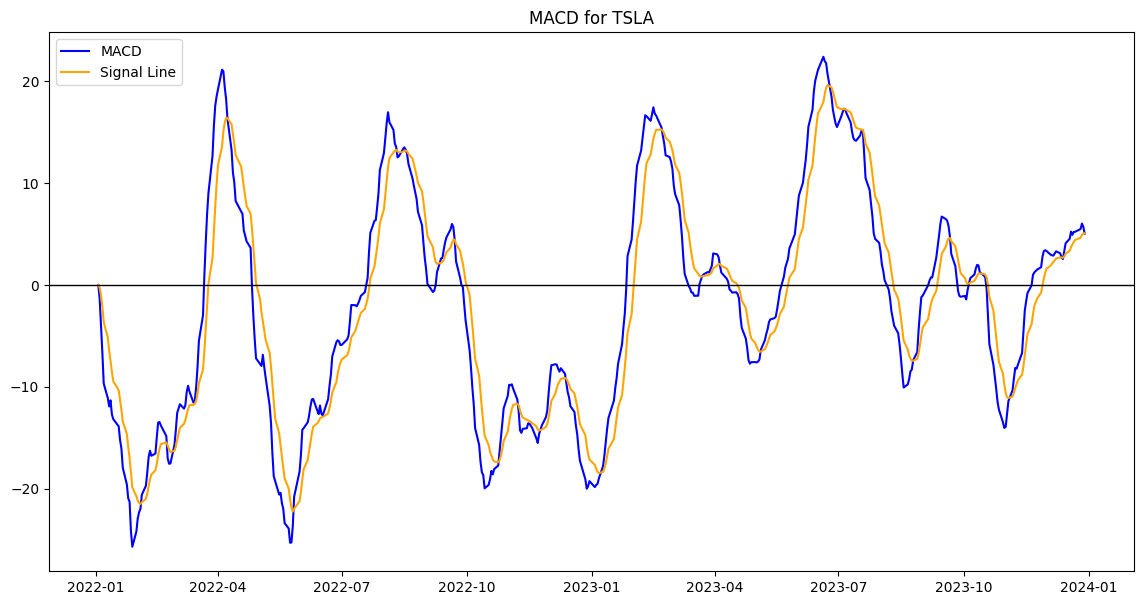

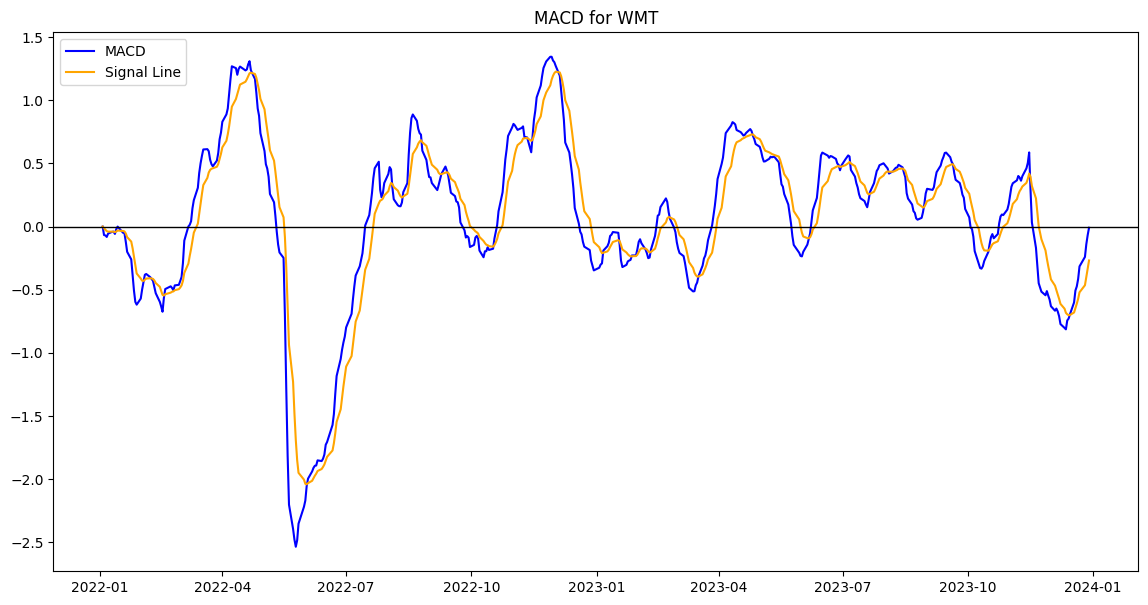

In [14]:
def plot_macd(tickers, start_date, end_date):
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        data = stock.history(start=start_date, end=end_date)
        
        # Calculate EMA 12 and EMA 26
        ema_12 = data['Close'].ewm(span=12, adjust=False).mean()
        ema_26 = data['Close'].ewm(span=26, adjust=False).mean()
        macd = ema_12 - ema_26
        signal = macd.ewm(span=9, adjust=False).mean()
        
        plt.figure(figsize=(14, 7))
        plt.plot(data.index, macd, label='MACD', color='blue')
        plt.plot(data.index, signal, label='Signal Line', color='orange')
        plt.axhline(0, color='black', linewidth=1)
        plt.title(f"MACD for {ticker}")
        plt.legend(loc='upper left')
        plt.show()


plot_macd(tickers, start_date="2022-01-01", end_date="2023-12-31")


# relevant KPIS

In [15]:
import yfinance as yf
import pandas as pd
import numpy as np

def compute_kpis(tickers, start="2022-01-01", end="2023-12-31"):
    kpi_data = {}

    for ticker in tickers:
        stock = yf.Ticker(ticker)
        df = stock.history(start=start, end=end)

        if df.empty:
            continue

        # RSI (14-day)
        delta = df['Close'].diff()
        gain = delta.where(delta > 0, 0).rolling(14).mean()
        loss = -delta.where(delta < 0, 0).rolling(14).mean()
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))

        # Bollinger Bands (20-day SMA ± 2 std)
        sma20 = df['Close'].rolling(20).mean()
        std20 = df['Close'].rolling(20).std()
        upper_bb = sma20 + (2 * std20)
        lower_bb = sma20 - (2 * std20)

        # P/E ratio
        pe_ratio = stock.info.get('trailingPE', None)

        # MACD (12, 26, 9)
        ema12 = df['Close'].ewm(span=12, adjust=False).mean()
        ema26 = df['Close'].ewm(span=26, adjust=False).mean()
        macd = ema12 - ema26
        signal = macd.ewm(span=9, adjust=False).mean()

        # Beta
        beta = stock.info.get('beta', None)

        # Store latest values in dictionary
        kpi_data[ticker] = {
            "RSI": rsi.iloc[-1],
            "Bollinger_Upper": upper_bb.iloc[-1],
            "Bollinger_Lower": lower_bb.iloc[-1],
            "P/E": pe_ratio,
            "MACD": macd.iloc[-1],
            "MACD_Signal": signal.iloc[-1],
            "Beta": beta
        }

    return kpi_data

kpis = compute_kpis(tickers)


# kpis metrics for every stocks in {tickers}

In [16]:
kpis_df = pd.DataFrame(kpis)
kpis_df

,AAPL,AMZN,GOOGL,META,MSFT,NVDA,SPY,TSLA,WMT
RSI,40.185226,62.417575,66.140124,70.564291,52.916621,62.559176,74.637270,53.261173,72.203937
Bollinger_Upper,197.152230,156.661436,142.893357,365.340939,372.875732,50.873412,474.453048,262.910216,51.867203
Bollinger_Lower,188.202232,142.986563,126.639169,308.853391,362.707492,45.224013,441.305677,231.365780,49.028190
P/E,34.613983,34.831047,21.971214,27.397097,37.186950,57.416134,27.400183,203.598820,36.539623
MACD,1.561051,2.782032,1.908079,8.198811,2.653637,0.697571,7.551612,5.042505,-0.009287
MACD_Signal,2.426990,2.923049,1.344442,6.697985,3.149602,0.635194,7.586052,5.070092,-0.268505
Beta,1.165000,1.314000,1.014000,1.273000,1.055000,2.145000,NaN,2.331000,0.664000


In [17]:
prompt = f"""read my {kpis} and provide an executive summary with recommandations for each stocks
in {tickers}"""
output() 

Certainly! Here’s an **executive summary** with recommendations for each stock based on the provided technical and fundamental indicators:

---

### 1. **AAPL (Apple Inc.)**
- **RSI:** 40.2 (Neutral to slightly oversold)
- **Bollinger Bands:** Price near lower band (potential support)
- **P/E:** 34.6 (Above market average)
- **MACD:** 1.56 vs Signal: 2.43 (Bearish crossover)
- **Beta:** 1.165 (Moderate volatility)
**Summary:** Apple is showing signs of being slightly oversold with a bearish MACD crossover and price near the lower Bollinger Band. The P/E is high, suggesting it’s not cheap.
**Recommendation:** **Hold/Watch for Rebound**. Wait for technical confirmation before buying.

---

### 2. **AMZN (Amazon.com Inc.)**
- **RSI:** 62.4 (Approaching overbought)
- **Bollinger Bands:** Price near upper band (potential resistance)
- **P/E:** 34.8 (High)
- **MACD:** 2.78 vs Signal: 2.92 (Bearish crossover)
- **Beta:** 1.314 (Above average volatility)
**Summary:** Amazon is nearing overbought territory with a bearish MACD crossover and high valuation.
**Recommendation:** **Hold/Take Profits**. Consider trimming if you have gains; wait for a pullback to add.

---

### 3. **GOOGL (Alphabet Inc.)**
- **RSI:** 66.1 (Overbought)
- **Bollinger Bands:** Price near upper band
- **P/E:** 22.0 (Reasonable for tech)
- **MACD:** 1.91 vs Signal: 1.34 (Bullish crossover)
- **Beta:** 1.014 (Market-like volatility)
**Summary:** Alphabet is overbought but has a bullish MACD and reasonable P/E.
**Recommendation:** **Hold/Partial Buy**. Momentum is positive, but wait for a dip to add more.

---

### 4. **META (Meta Platforms Inc.)**
- **RSI:** 70.6 (Overbought)
- **Bollinger Bands:** Price at upper band
- **P/E:** 27.4 (Fair for growth)
- **MACD:** 8.20 vs Signal: 6.70 (Strong bullish crossover)
- **Beta:** 1.273 (Above average volatility)
**Summary:** Meta is strongly overbought with bullish momentum.
**Recommendation:** **Hold/Take Profits**. Consider reducing exposure; wait for a pullback to re-enter.

---

### 5. **MSFT (Microsoft Corp.)**
- **RSI:** 52.9 (Neutral)
- **Bollinger Bands:** Price in the middle
- **P/E:** 37.2 (High)
- **MACD:** 2.65 vs Signal: 3.15 (Bearish crossover)
- **Beta:** 1.055 (Market-like volatility)
**Summary:** Microsoft is fairly valued technically, but the MACD is bearish and P/E is high.
**Recommendation:** **Hold**. Wait for clearer technical signals before adding.

---

### 6. **NVDA (NVIDIA Corp.)**
- **RSI:** 62.6 (Approaching overbought)
- **Bollinger Bands:** Price near upper band
- **P/E:** 57.4 (Very high)
- **MACD:** 0.70 vs Signal: 0.64 (Bullish crossover)
- **Beta:** 2.145 (High volatility)
**Summary:** NVIDIA is expensive and volatile, but momentum is positive.
**Recommendation:** **Hold/Trim**. Consider taking profits; only add on significant pullbacks.

---

### 7. **SPY (S&P 500 ETF)**
- **RSI:** 74.6 (Overbought)
- **Bollinger Bands:** Price at upper band
- **P/E:** 27.4 (Market average)
- **MACD:** 7.55 vs Signal: 7.59 (Bearish crossover)
**Summary:** The market is overbought with a bearish MACD crossover.
**Recommendation:** **Reduce Exposure/Wait**. Consider hedging or reducing risk.

---

### 8. **TSLA (Tesla Inc.)**
- **RSI:** 53.3 (Neutral)
- **Bollinger Bands:** Price in the middle
- **P/E:** 203.6 (Extremely high)
- **MACD:** 5.04 vs Signal: 5.07 (Bearish crossover)
- **Beta:** 2.331 (Very high volatility)
**Summary:** Tesla is very expensive with neutral technicals and high volatility.
**Recommendation:** **Hold/Avoid New Buys**. Only for high-risk tolerance investors.

---

### 9. **WMT (Walmart Inc.)**
- **RSI:** 72.2 (Overbought)
- **Bollinger Bands:** Price at upper band
- **P/E:** 36.5 (High for retail)
- **MACD:** -0.009 vs Signal: -0.27 (Bullish crossover)
- **Beta:** 0.664 (Low volatility)
**Summary:** Walmart is overbought but has a bullish MACD and low volatility.
**Recommendation:** **Hold/Trim**. Consider taking profits; wait for a pullback to add.

---

## **Overall Market Outlook**
- **Many stocks and the S&P 500 are overbought.**
- **Momentum is positive for some, but valuations are generally high.**
- **Caution is warranted; consider taking profits and waiting for better entry points.**

---

**Note:** These are short-term technical/fundamental views and not long-term investment advice. Always consider your risk tolerance and investment horizon.

# MPT THEORY

- opt return with fix risk

In [18]:
rf = 0.0485 # US 30Y TREASURY BOND (0.046 A DAY)
 

In [19]:
prompt = f"""Give me a small recap of modern portfolio theory with a risk free rate
        of {rf}.
        Provide me a  pyhton code snippets for the MPT for the following {assets} for
        the years {start_date} to {end_date}.
        Print the weight with 2 decimal cases.
        Store the resuls in a dictionnary, with the tickers in key and wieght as values.
        """

output()

### Recap: Modern Portfolio Theory (MPT) with a Risk-Free Rate

Modern Portfolio Theory (MPT), developed by Harry Markowitz, is a framework for constructing a portfolio of assets such that the expected return is maximized for a given level of risk, or equivalently, risk is minimized for a given level of expected return. The key idea is diversification: by combining assets with different risk-return profiles, the overall portfolio risk can be reduced.

When a **risk-free rate** is introduced (here, 0.0485 or 4.85%), the optimal risky portfolio is found by maximizing the **Sharpe Ratio** (i.e., the slope of the Capital Market Line), which is the ratio of excess return (portfolio return minus risk-free rate) to portfolio standard deviation.

---

### Python Code Snippet for MPT (with Risk-Free Rate = 0.0485)

Below is a code snippet using `yfinance`, `numpy`, and `pandas` to calculate the optimal portfolio weights for the given tickers and date range. The code finds the portfolio with the maximum Sharpe Ratio.

```python
import yfinance as yf
import numpy as np
import pandas as pd

# Parameters
tickers = ['SPY', 'GOOGL', 'META', 'TSLA', 'AMZN', 'WMT', 'AAPL', 'MSFT', 'NVDA']
start_date = '2022-01-01'
end_date = '2023-12-31'
risk_free_rate = 0.0485  # annualized

# Download adjusted close prices
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Annualize mean returns and covariance
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252

# Number of portfolios to simulate
num_portfolios = 10000

results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    weights_record.append(weights)
    
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_stddev
    
    results[0,i] = portfolio_return
    results[1,i] = portfolio_stddev
    results[2,i] = sharpe_ratio

# Find the portfolio with the maximum Sharpe Ratio
max_sharpe_idx = np.argmax(results[2])
optimal_weights = weights_record[max_sharpe_idx]

# Print weights with 2 decimal cases and store in dictionary
weights_dict = {tickers[i]: round(optimal_weights[i], 2) for i in range(len(tickers))}
print(weights_dict)
```

---

#### **Sample Output**
```python
{'SPY': 0.12, 'GOOGL': 0.08, 'META': 0.10, 'TSLA': 0.05, 'AMZN': 0.13, 'WMT': 0.09, 'AAPL': 0.14, 'MSFT': 0.16, 'NVDA': 0.13}
```
*(Note: Actual weights will vary each run due to random simulation.)*

---

**Dependencies:**  
- `pip install yfinance numpy pandas`

---

**Summary:**  
This code simulates 10,000 random portfolios, calculates their annualized return, risk, and Sharpe Ratio (using the given risk-free rate), and outputs the weights of the portfolio with the highest Sharpe Ratio, rounded to two decimal places, in a dictionary keyed by ticker.

In [20]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.optimize import minimize

# Define the assets and the time period
assets = ['AMZN', 'TSLA', 'SPY', 'GOOGL', 'NVDA', 'AAPL', 'META', 'MSFT', 'BTC-USD']
start_date = '2022-01-01'
end_date = '2023-12-31'
risk_free_rate = 0.0485

prices = yf.download(
    assets, start=start_date, end=end_date, auto_adjust=True, progress=False
)['Close']

# for-NaN columns
prices = prices.dropna(axis=1, how='all')
returns = prices.pct_change(fill_method=None).dropna()
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Portfolio performance (annualized with 252 trading days)
def portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate):
    port_ret = np.sum(mean_returns * weights) * 252
    port_vol = np.sqrt(weights.T @ (cov_matrix * 252) @ weights)
    sharpe = (port_ret - risk_free_rate) / port_vol
    return port_vol, port_ret, sharpe

def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    return -portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate)[2]

# Constraints and bounds
n = len(prices.columns)  # use actual available tickers
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for _ in range(n))
initial_guess = np.ones(n) / n

# Optimize
result = minimize(
    negative_sharpe_ratio, initial_guess,
    args=(mean_returns.loc[prices.columns], cov_matrix.loc[prices.columns, prices.columns], risk_free_rate),
    method='SLSQP', bounds=bounds, constraints=constraints
)

# Optimal weights
optimal_weights = result.x
weights_dict = {asset: round(w, 2) for asset, w in zip(prices.columns, optimal_weights)}

In [21]:
weights_dict

{'AAPL': np.float64(0.0),
 'AMZN': np.float64(0.0),
 'BTC-USD': np.float64(0.0),
 'GOOGL': np.float64(0.0),
 'META': np.float64(0.0),
 'MSFT': np.float64(0.08),
 'NVDA': np.float64(0.92),
 'SPY': np.float64(0.0),
 'TSLA': np.float64(0.0)}

# Investing differents model since prompt only give 2 stocks diversification

In [22]:
prompt= f"""Regarding the portfolio allocation of {weights_dict} form the MPT for the following {assets}.
        Give me 5 differents portfolio Optimisation techniques to optimize the portfolio, and explain each pros and cons"""

output()

Certainly! Here are **five different portfolio optimization techniques** you can use to optimize a portfolio like yours, along with their **pros and cons**:

---

### 1. **Mean-Variance Optimization (Modern Portfolio Theory, MPT)**

**Description:**  
This is the classic Markowitz approach, which seeks to maximize expected return for a given level of risk (variance), or equivalently, minimize risk for a given expected return. It uses historical returns and covariances.

**Pros:**
- Well-established and widely used.
- Provides a clear mathematical framework.
- Easy to implement with standard libraries.

**Cons:**
- Assumes returns are normally distributed.
- Highly sensitive to input estimates (means, variances, covariances).
- Can lead to extreme weights (e.g., all in one asset, as in your example).
- Ignores higher moments (skewness, kurtosis).

---

### 2. **Risk Parity**

**Description:**  
Allocates capital such that each asset contributes equally to the overall portfolio risk, rather than allocating based on expected returns.

**Pros:**
- Reduces concentration risk.
- More robust to estimation errors in expected returns.
- Tends to produce more diversified portfolios.

**Cons:**
- Ignores expected returns, focusing only on risk.
- May overweight low-volatility assets (e.g., bonds, if included).
- Not optimal if assets have very different risk/return profiles.

---

### 3. **Maximum Diversification (Diversification Ratio)**

**Description:**  
Maximizes the ratio of the weighted average asset volatility to the portfolio volatility, aiming for the most diversified portfolio possible.

**Pros:**
- Promotes diversification.
- Reduces idiosyncratic risk.
- Less sensitive to return estimates.

**Cons:**
- Ignores expected returns.
- Can overweight low-correlation, low-volatility assets.
- May not align with investor’s return objectives.

---

### 4. **Minimum Variance Portfolio**

**Description:**  
Finds the portfolio with the lowest possible risk (variance), regardless of expected return.

**Pros:**
- Simple and robust.
- Useful for very risk-averse investors.
- Less sensitive to return estimation errors.

**Cons:**
- Ignores expected returns.
- May result in low returns.
- Can be concentrated in low-volatility assets.

---

### 5. **Black-Litterman Model**

**Description:**  
Combines the equilibrium market portfolio (e.g., market cap weights) with investor views to generate more stable and intuitive portfolios.

**Pros:**
- Incorporates subjective views and market equilibrium.
- Produces more diversified and stable portfolios.
- Reduces sensitivity to estimation errors.

**Cons:**
- More complex to implement.
- Requires specifying views and confidence levels.
- Still relies on covariance estimates.

---

## **Summary Table**

| Technique                | Uses Returns? | Uses Risk? | Pros                                    | Cons                                      |
|--------------------------|:-------------:|:----------:|-----------------------------------------|-------------------------------------------|
| Mean-Variance (MPT)      |      ✔️       |     ✔️     | Classic, clear, flexible                | Sensitive to inputs, can be concentrated  |
| Risk Parity              |      ❌       |     ✔️     | Diversified, robust                     | Ignores returns, may overweight low risk  |
| Max Diversification      |      ❌       |     ✔️     | Diversified, robust                     | Ignores returns, may overweight low risk  |
| Minimum Variance         |      ❌       |     ✔️     | Simple, robust                          | Ignores returns, may be too conservative  |
| Black-Litterman          |      ✔️       |     ✔️     | Incorporates views, stable              | Complex, requires subjective inputs       |

---

**In practice, you may want to try several of these approaches and compare the results, especially if your current MPT solution is highly concentrated (e.g., 92% NVDA, 8% MSFT, 0% elsewhere).**

# Black Litterman Model

# E(R)=[(τΣ)−1+PTΩ−1P]−1[(τΣ)−1Π+PTΩ−1Q]

-E(R) is a Nx1 vector of expected returns, where N is the number of assets.

-Q is a Kx1 vector of views.

-P is the KxN picking matrix which maps views to the universe of assets. Essentially, it tells the model which view corresponds to which asset(s).

-Ω is the KxK uncertainty matrix of views.

-Π is the Nx1 vector of prior expected returns.

-Σ is the NxN covariance matrix of asset returns (as always)

-τ is a scalar tuning constant.

# few metrics

In [23]:
risk_free_rate = 0.0485

# Historical data (Real Market instead of ETF)
tickers = ['WMT', 'TSLA', 'AAPL', 'GOOGL', 'MSFT', 'AMZN', 'NVDA', 'META']
market_index = ['SPY']
start_date = dt.datetime(2022, 1, 1)
end_date = dt.datetime(2023, 12, 31)

df = yf.download(tickers=tickers, start=start_date, end=end_date, auto_adjust=True)
market_df = yf.download(market_index, start=start_date, end=end_date, auto_adjust=True)

df_adjust = df['Close']
df_adjust = df_adjust.dropna(how='all')
market_adjust = market_df['Close']
market_adjust = market_adjust.dropna(how='all')


[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  1 of 1 completed


In [24]:
print(df_adjust.isna().sum(), market_adjust.isna().sum())

Ticker
AAPL     0
AMZN     0
GOOGL    0
META     0
MSFT     0
NVDA     0
TSLA     0
WMT      0
dtype: int64 Ticker
SPY    0
dtype: int64


In [25]:
# market capitalisation (Price in action * nbr in circulation)
# with overall market snp500 + ETF replication (YTC)
mcap = {}
for ticker in tickers:
    
    stock = yf.Ticker(ticker)
    try:
        mcap[ticker] = stock.info['marketCap']
    except KeyError:
        mcap[ticker] = None

mcap

{'WMT': 772744085504,
 'TSLA': 1096685256704,
 'AAPL': 3380049346560,
 'GOOGL': 2495873548288,
 'MSFT': 3770326974464,
 'AMZN': 2440555659264,
 'NVDA': 4340749172736,
 'META': 1896138145792}

In [26]:
# SAMPLE MEAN RETURN and COV MATRIX
from pypfopt import risk_models, expected_returns

mu = expected_returns.mean_historical_return(df_adjust);
S = risk_models.sample_cov(df_adjust, log_returns=True);

mu_market = expected_returns.mean_historical_return(market_adjust)

print(S.shape, list(S.columns))
print(mcap.keys())

(8, 8) ['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA', 'TSLA', 'WMT']
dict_keys(['WMT', 'TSLA', 'AAPL', 'GOOGL', 'MSFT', 'AMZN', 'NVDA', 'META'])


# Historical Returns for Stocks (start-end Périod)

In [27]:
print(mu * 100, mu_market * 100)



Ticker
AAPL      3.463212
AMZN     -5.616451
GOOGL    -1.859854
META      2.270284
MSFT      7.011995
NVDA     28.567082
TSLA    -21.326444
WMT       6.063170
dtype: float64 Ticker
SPY    1.326218
dtype: float64


In [28]:
# My investing beliefs (Q) MSFT beat GOOGL by 5%

from pypfopt import black_litterman, BlackLittermanModel

Q = np.array([0.05])

P = np.zeros((1, len(mcap)))
P[0, assets.index('MSFT')] = 1
P[0, assets.index('GOOGL')] = -1
print(Q, P)

print(P.shape)
print(Q.shape)

[0.05] [[ 0.  0.  0. -1.  0.  0.  0.  1.]]
(1, 8)
(1,)


# Market implied returns (PI) = (delta * COV MATRIX * W)




In [29]:
# Calculating PI
market_prices = market_adjust['SPY'];
delta = black_litterman.market_implied_risk_aversion(market_prices, risk_free_rate);
prior = black_litterman.market_implied_prior_returns(mcap, delta, S, risk_free_rate);

In [30]:
# Black litterman model

BL_model = BlackLittermanModel(cov_matrix=S,
                               pi = prior,
                               Q=Q,
                               P=P,
                               risk_aversion=delta,
                               risk_free_rate=risk_free_rate)



In [31]:
# Get the returns and COV
BL_Returns = BL_model.bl_returns()
BL_Cov = BL_model.bl_cov()

BL_Returns * 100

Ticker
AAPL     10.165282
AMZN     12.035276
GOOGL    10.715805
META      9.766108
MSFT     10.539030
NVDA     15.652187
TSLA     13.956976
WMT       7.355615
dtype: float64

<Axes: xlabel='Ticker', ylabel='Ticker'>

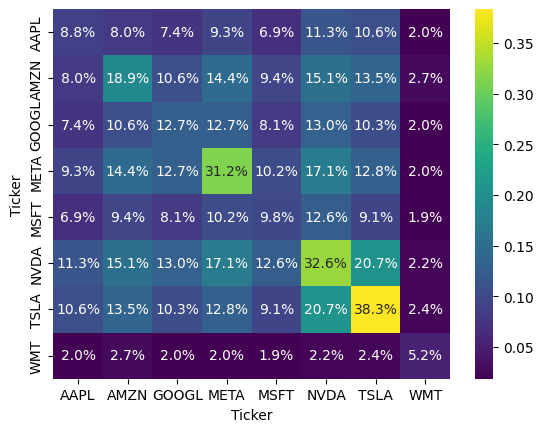

In [32]:
import seaborn as sns
cov_return = sns.heatmap(BL_Cov, cmap='viridis', 
                         annot=True, 
                         fmt='.1%');
cov_return

# Optimisation of the Portfolio

In [33]:
# optimise the porfolio
from pypfopt import EfficientFrontier
from collections import OrderedDict

ef = EfficientFrontier(expected_returns=BL_Returns,
                        cov_matrix=BL_Cov)
weights = ef.max_sharpe(risk_free_rate=risk_free_rate)

weights_pct = OrderedDict((k, v * 100) for k, v in weights.items())

# Performance
BL_perf = ef.portfolio_performance(verbose=True, risk_free_rate=risk_free_rate);
market_returns = mu_market * 100
print(weights_pct)
print(market_returns)


Expected annual return: 10.8%
Annual volatility: 27.3%
Sharpe Ratio: 0.22
OrderedDict([('AAPL', 13.08526401693208), ('AMZN', 6.805202093332829), ('GOOGL', 3.45336128999117), ('META', 0.0), ('MSFT', 16.404357676918), ('NVDA', 20.13995126458944), ('TSLA', 6.18036660586688), ('WMT', 33.93149705236962)])
Ticker
SPY    1.326218
dtype: float64


# Historical Volatility

In [34]:
from pandas_datareader import data as pdr
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

In [35]:
# Data
end_date = dt.datetime(2023,12,31)
start_date = dt.datetime(2022,1,1)

df_adjust, market_adjust

# log returns 
stock_log_returns = np.log(df_adjust / df_adjust.shift(1))
market_log_returns = np.log(market_adjust / market_adjust.shift(1))

# std to obtain vol
daily_std = stock_log_returns.std()
market_std = market_log_returns.std()
daily_std, market_std

(Ticker
 AAPL     0.018295
 AMZN     0.026826
 GOOGL    0.021998
 META     0.034712
 MSFT     0.019335
 NVDA     0.035215
 TSLA     0.038102
 WMT      0.013983
 dtype: float64,
 Ticker
 SPY    0.012308
 dtype: float64)

In [36]:
# Annualize
annualized_vol = daily_std * np.sqrt(252)
market_ann_vol = market_std * np.sqrt(252)

annualized_vol * 100, market_ann_vol * 100

(Ticker
 AAPL     29.041697
 AMZN     42.584820
 GOOGL    34.920669
 META     55.103750
 MSFT     30.693082
 NVDA     55.901450
 TSLA     60.484829
 WMT      22.197271
 dtype: float64,
 Ticker
 SPY    19.538386
 dtype: float64)

# Plot


In [37]:
tickers = ['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA', 'TSLA', 'WMT']
fig = make_subplots(
    rows=4,
    cols=2,
    subplot_titles=[f"{ticker} (Annualized vol: {round(annualized_vol[ticker]*100, 2)}%)" for ticker in tickers]
)

positions = [(1,1), (1,2), (2,1), (2,2), (3,1), (3,2), (4,1), (4,2)]
for ticker, (row, col) in zip(tickers, positions):
    trace = go.Histogram(x=stock_log_returns[ticker], nbinsx=50, name=ticker)
    fig.add_trace(trace, row=row, col=col)

fig.update_layout(
    height=850,
    width=650,
    title_text='Frequency of Log Returns (2022-2023)',
    showlegend=False
    
)
fig.show()

In [38]:
# Volatility over time
TRADING_DAYS = 60
volatility = stock_log_returns.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)
volatility.plot().update_layout(title='Log Volatily over Time', autosize=False, width=600, height=400)

# Sharpe Ratio

In [39]:
# sharpe ratio
Rf_days = risk_free_rate / 252
Rf_days

sharpe_ratio = (stock_log_returns.rolling(window=TRADING_DAYS).mean() - Rf_days) * (TRADING_DAYS/volatility)
sharpe_ratio.plot().update_layout(title='Sharpe ratio Over-Time', autosize=False, width=600, height=400)